In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
juns_quiz = pd.read_csv("2017_jun_final.csv")
juns_quiz.head(5)

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
juns_quiz.shape

(8704, 25)

In [5]:
juns_quiz.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
missing_percentages = (juns_quiz.isnull().sum() / len(juns_quiz)) * 100
missing_percentages

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [7]:
juns_quiz = juns_quiz.drop(columns=["Спеціалізація", "Університет", "Предметна область", "Валюта", "cls"], axis=1)
juns_quiz.head(5)

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


In [8]:
juns_quiz.shape

(8704, 20)

In [10]:
missing_percentages = (juns_quiz.isnull().sum() / len(juns_quiz)) * 100
missing_percentages

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64

In [11]:
juns_quiz = juns_quiz.dropna()
juns_quiz.shape

(4854, 20)

In [12]:
python_data = juns_quiz[juns_quiz["Мова програмування"] == 'Python']
python_data.head(5)

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


In [13]:
python_data.shape

(207, 20)

In [12]:
python_data = python_data.groupby("Посада")

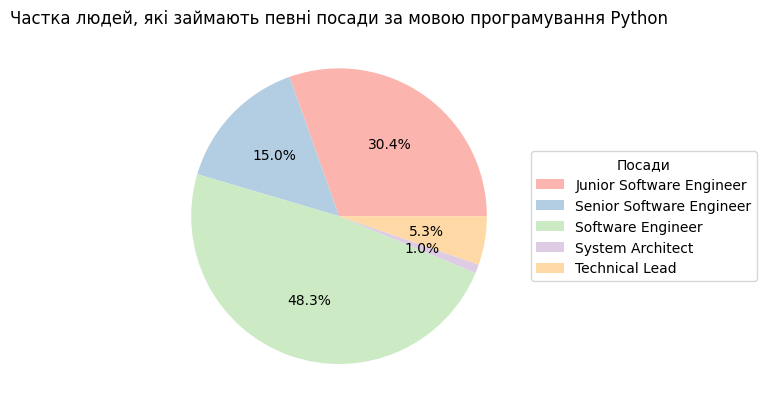

In [44]:
job_counts = python_data['Посада'].value_counts()

wedges, texts, autotexts = plt.pie(job_counts, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.legend(wedges, job_counts.index,
           title="Посади",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Частка людей, які займають певні посади за мовою програмування Python')

plt.show()

In [41]:
aggregated_data = python_data.agg(
    min_salary=pd.NamedAgg(column="Зарплата на місяць", aggfunc='min'),
    max_salary=pd.NamedAgg(column="Зарплата на місяць", aggfunc='max')
)
aggregated_data

,min_salary,max_salary
Посада,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


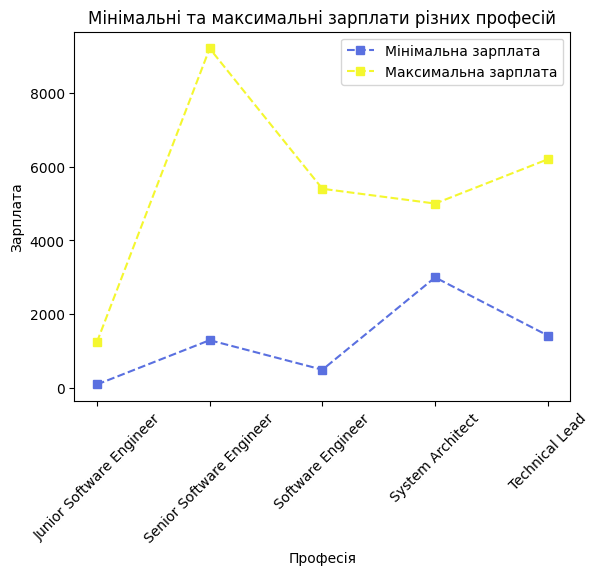

In [28]:
job_titles = aggregated_data.index.tolist()

min_salaries = aggregated_data['min_salary'].tolist()
max_salaries = aggregated_data['max_salary'].tolist()

plt.plot(job_titles, min_salaries, label='Мінімальна зарплата', linestyle='--', color='#5a70e0', marker='s')
plt.plot(job_titles, max_salaries, label='Максимальна зарплата', linestyle='--', color='#f4f72f', marker='s')

plt.xticks(rotation=45)
plt.title('Мінімальні та максимальні зарплати різних професій')
plt.xlabel('Професія')
plt.ylabel('Зарплата')

plt.legend()

plt.show()

In [14]:
def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean().round(1)
aggregated_data['avg'] = python_data.apply(fill_avg_salary, include_groups=False)
aggregated_data

,min_salary,max_salary,avg
Посада,,,
Junior Software Engineer,100,1250,560.8
Senior Software Engineer,1300,9200,3387.1
Software Engineer,500,5400,1799.1
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3165.9


In [17]:
avg_stats = aggregated_data['avg'].describe()
avg_stats

count       5.000000
mean     2582.580000
std      1387.266141
min       560.800000
25%      1799.100000
50%      3165.900000
75%      3387.100000
max      4000.000000
Name: avg, dtype: float64

In [16]:
aggregated_data.to_csv('hw2_2_result.csv')

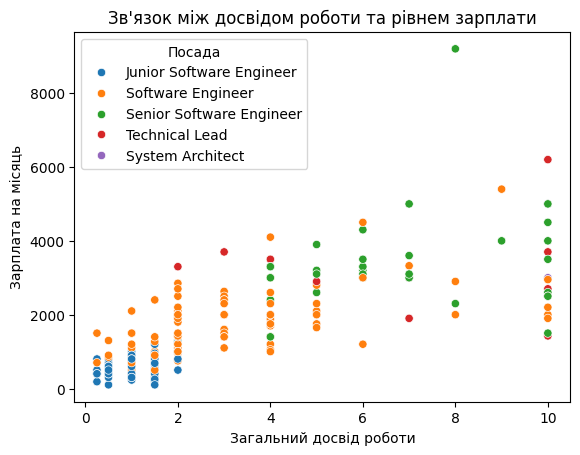

In [61]:
work_exp = python_data.copy()
work_exp = work_exp.iloc[:, [3, 5, 1]]

work_exp['Загальний досвід роботи'] = work_exp['Загальний досвід роботи'].replace({
   'менше 3 місяців': '1.5',
   '10 і більше років': '10'
})
work_exp['Загальний досвід роботи'] = pd.to_numeric(work_exp['Загальний досвід роботи'], errors='coerce')

work_exp_sorted = work_exp.sort_values(by='Загальний досвід роботи', ascending=True)

exp = work_exp_sorted['Загальний досвід роботи']
salary_month = work_exp_sorted['Зарплата на місяць']

ax = sns.scatterplot(x='Загальний досвід роботи', y='Зарплата на місяць', hue='Посада', data=work_exp_sorted)
ax.set_title("Зв'язок між досвідом роботи та рівнем зарплати")
plt.show()